# <span style='color:OrangeRed'>V1 DAS ABTASTTHEOREM </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">

Hier wird analysiert, wie man die geeignete Abtastfrequenz für ein bestimmtes System auswählt. Am Ende überprüfen wir das Ergebnis mit einer einfachen Simulation.


In [1]:
% Necessary to use control toolbox
pkg load control
clear all

% Set the Octsim Engine to run the simulation
addpath('../Octsim');


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Es ist das folgende System in Form einer Übertragungsfunktion gegeben:

In [2]:
num = [100]
den = [1 10 100]
G = tf(num,den)

num =  100
den =

     1    10   100


Transfer function 'G' from input 'u1' to output ...

            100       
 y1:  ----------------
      s^2 + 10 s + 100

Continuous-time model.


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">

Berechnet man die Nullstellen des Nenners, erhält man die Pole des Systems:

In [3]:
p = roots(den)

p =

  -5.0000 + 8.6603i
  -5.0000 - 8.6603i



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">

Aus den Polen berechnen wir die Zeitkonstanten:

In [4]:
tau = -1./real(p)

tau =

   0.100000   0.100000



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
und aus den Zeitkonstanten die Eigenfrequenzen:

In [5]:
om = 2*pi./tau

om =

   62.832   62.832



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die minimale Abtastfrequenz ist durch das Zweifache der maximalen Eigenfrequenz des Systems gegeben.

In [6]:
minomt = 2*max(om) 

minomt =  125.66


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Wir wählen dann einen Wert, der größer ist als das Minimum durch den Koeffizienten K.

In [7]:
K = 2
omt = K*minomt

K =  2
omt =  251.33


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Schließlich testen wir die Wahl der Abtastzeit, indem wir die Sprungantwort simulieren und den Ausgang abtasten.

tini = 0
tfinal =  3
dt =  0.0010000
nflows =  3
Ts =  0.025000


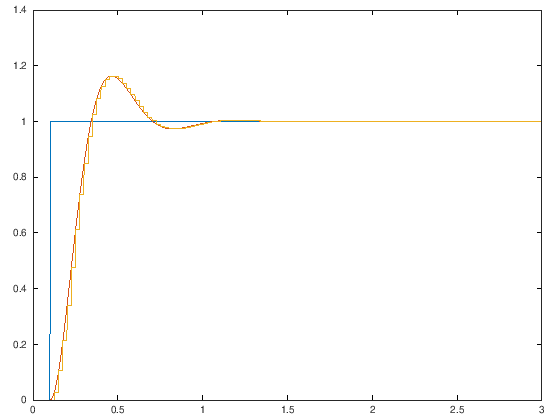

In [8]:
addpath("../Octsim");
tini = 0 # Start time
tfinal = 3 # End time
dt = 0.001 # Time Step
nflows = 3 #Number of data flows in the schematic, Zahlenwert entspricht nicht dem in Matlab (hier um 1 größer)
Ts = 2*pi/omt # Sampling time for discrete time

c1{1} = StepSource(1,0,1,0.1); #StepSource(self,out,startv,endv,ts)
c1{2} = TransferFunction(1,2,num,den); #TransferFunction(self,inp,out,num,den)
c1{3} = DTTransferFunction(2,3,1,1,Ts); #DTTransferFunction(self,inp,out,num,den,Ts)

% Instance of the simulation schematic
sc1 = Schema(tini,tfinal,dt,nflows);

sc1.AddListComponents(c1);

% Run the schematic and plot
out1 = sc1.Run([1 2 3]);
plot(out1(1,:),out1(2,:),out1(1,:),out1(3,:),out1(1,:),out1(4,:));